# 3. MLP

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Activity: Understanding Multi-Layer Perceptrons (MLPs)
This activity is designed to test your skills in Multi-Layer Perceptrons (MLPs).

## Exercise 1

Consider a simple MLP with 2 input features, 1 hidden layer containing 2 neurons, and 1 output neuron. Use the hyperbolic tangent (tanh) function as the activation for both the hidden layer and the output layer. The loss function is mean squared error (MSE): L = 1/N * (y - ŷ)², where ŷ is the network's output.

For this exercise, use the following specific values:

* Input and output vectors:
    * X: [0.5, -0.2]
    * Y: 1.0

* Hidden layer weights:
    * W¹ = [[0.3, -0.1], 
             [0.2, 0.4]]  (2x2 matrix)
 
* Hidden layer biases:
    * b¹ = [0.1, -0.2]  (1x2 vector)

* Output layer weights:
    * W² = [0.5, -0.3]

* Output layer bias:
    * b² = 0.2

* Learning rate: 
    * η = 0.3

* Activation function: tanh

Perform the following steps explicitly, showing all mathematical derivations and calculations with the provided values:

1. **Forward Pass**:
   * Compute the hidden layer pre-activations: Z¹ = W¹ * X + b¹.
   * Apply tanh to get hidden activations: a¹ = tanh(Z¹).
   * Compute the output pre-activation: Z² = W² * a¹ + b².
   * Compute the final output: ŷ = tanh(Z²).

2. **Loss Calculation**:
   * Compute the loss: L = 1/N * (Y - ŷ)².

3. **Backward Pass (Backpropagation)**: Compute the gradients of the loss with respect to all weights and biases. Start with delL/delŷ then compute:
   * delL/delZ² (using the tanh derivative: del/delZ tanh(Z) = 1 - tanh²(Z)).
   * Gradients for output layer: delL/delW², delL/delb².
   * Propagate to hidden layer: delL/delA¹, delL/delZ¹.
   * Gradients for hidden layer: delL/delW¹, delL/delb¹.
   * Show all intermediate steps and calculations.

4. **Parameter Update**: Using the learning rate η = 0.1, update all weights and biases via gradient descent:
   * W² <- W² - η * delL/delW²
   * b² <- b² - η * delL/delb²
   * W¹ <- W¹ - η * delL/delW¹
   * b¹ <- b¹ - η * delL/delb¹
   * Provide the numerical values for all updated parameters.

**Submission Requirements**: Show all mathematical steps explicitly, including intermediate calculations (e.g., matrix multiplications, tanh applications, gradient derivations). Use exact numerical values throughout and avoid rounding excessively to maintain precision (at least 4 decimal places).

In [23]:
# --- Helpers ---
def tanh(x):
    return np.tanh(x)

def dtanh(z):
    return 1.0 - np.tanh(z)**2

def fmt(x):
    if isinstance(x, float):
        return f"{x:.6f}"
    arr = np.array(x, dtype=float)
    return np.array2string(arr, formatter={'float_kind':lambda v: f"{v:.6f}"},
                           floatmode='maxprec', suppress_small=False)

def p(title, value):
    print(f"{title}: {fmt(value)}")

# --- Dados do exercício ---
X = np.array([0.5, -0.2], dtype=float)
Y = 1.0 

W1 = np.array([[0.3, -0.1],
               [0.2,  0.4]], dtype=float)

b1 = np.array([0.1, -0.2], dtype=float)

W2 = np.array([0.5, -0.3], dtype=float)
b2 = 0.2

eta_update = 0.1

print("=== EXERCÍCIO 1 — MLP (tanh, MSE) ===\n")
p("X", X); p("Y", Y)
print("\n--- Parâmetros iniciais ---")
p("W1", W1); p("b1", b1); p("W2", W2); p("b2", b2)


=== EXERCÍCIO 1 — MLP (tanh, MSE) ===

X: [0.500000 -0.200000]
Y: 1.000000

--- Parâmetros iniciais ---
W1: [[0.300000 -0.100000]
 [0.200000 0.400000]]
b1: [0.100000 -0.200000]
W2: [0.500000 -0.300000]
b2: 0.200000


In [24]:
# === 1) Forward pass ===
Z1 = W1 @ X + b1
A1 = tanh(Z1)
Z2 = float(W2 @ A1 + b2)
Y_hat = float(tanh(Z2))

print("\n--- Forward Pass ---")
p("Z1 = W1 @ X + b1", Z1)
p("A1 = tanh(Z1)", A1)
p("Z2 = W2 · A1 + b2", Z2)
p("ŷ = tanh(Z2)", Y_hat)

# === 2) Loss ===
L = (Y - Y_hat)**2
print("\n--- Loss (MSE) ---")
p("L = (Y - ŷ)^2", L)



--- Forward Pass ---
Z1 = W1 @ X + b1: [0.270000 -0.180000]
A1 = tanh(Z1): [0.263625 -0.178081]
Z2 = W2 · A1 + b2: 0.385237
ŷ = tanh(Z2): 0.367247

--- Loss (MSE) ---
L = (Y - ŷ)^2: 0.400377


In [25]:
# === 3) Backpropagation ===

# Saída
dL_dYhat = 2.0*(Y_hat - Y)
dYhat_dZ2 = dtanh(Z2)
dL_dZ2 = dL_dYhat * dYhat_dZ2

print("\n-- Saída --")
p("dL/dŷ = 2*(ŷ - Y)", dL_dYhat)
p("dtanh(Z2) = 1 - tanh^2(Z2)", dYhat_dZ2)
p("dL/dZ2", dL_dZ2)

# Gradientes da camada de saída
dL_dW2 = dL_dZ2 * A1            # (2,)
dL_db2 = dL_dZ2                 # escalar

print("\n-- Gradientes camada de saída --")
p("dL/dW2 = dL/dZ2 * A1", dL_dW2)
p("dL/db2 = dL/dZ2", dL_db2)

# Propagação p/ camada oculta
dL_dA1 = dL_dZ2 * W2            # (2,)
dA1_dZ1 = dtanh(Z1)             # (2,)
dL_dZ1 = dL_dA1 * dA1_dZ1       # (2,)

print("\n-- Propagação para a oculta --")
p("dL/dA1 = dL/dZ2 * W2", dL_dA1)
p("dtanh(Z1) = 1 - tanh^2(Z1)", dA1_dZ1)
p("dL/dZ1 = dL/dA1 ⊙ dtanh(Z1)", dL_dZ1)

# Gradientes da camada oculta
dL_dW1 = np.outer(dL_dZ1, X)    # (2,2)
dL_db1 = dL_dZ1                 # (2,)

print("\n-- Gradientes camada oculta --")
p("dL/dW1 = outer(dL/dZ1, X)", dL_dW1)
p("dL/db1 = dL/dZ1", dL_db1)


-- Saída --
dL/dŷ = 2*(ŷ - Y): -1.265507
dtanh(Z2) = 1 - tanh^2(Z2): 0.865130
dL/dZ2: -1.094828

-- Gradientes camada de saída --
dL/dW2 = dL/dZ2 * A1: [-0.288624 0.194968]
dL/db2 = dL/dZ2: -1.094828

-- Propagação para a oculta --
dL/dA1 = dL/dZ2 * W2: [-0.547414 0.328448]
dtanh(Z1) = 1 - tanh^2(Z1): [0.930502 0.968287]
dL/dZ1 = dL/dA1 ⊙ dtanh(Z1): [-0.509370 0.318032]

-- Gradientes camada oculta --
dL/dW1 = outer(dL/dZ1, X): [[-0.254685 0.101874]
 [0.159016 -0.063606]]
dL/db1 = dL/dZ1: [-0.509370 0.318032]


In [26]:
# === 4) Atualização de parâmetros (η = 0.1) ===
W2_new = W2 - eta_update * dL_dW2
b2_new = b2 - eta_update * dL_db2
W1_new = W1 - eta_update * dL_dW1
b1_new = b1 - eta_update * dL_db1

p("\nW2_new = W2 - η*dL/dW2", W2_new)
p("b2_new = b2 - η*dL/db2", b2_new)
p("W1_new = W1 - η*dL/dW1", W1_new)
p("b1_new = b1 - η*dL/db1", b1_new)


W2_new = W2 - η*dL/dW2: [0.528862 -0.319497]
b2_new = b2 - η*dL/db2: 0.309483
W1_new = W1 - η*dL/dW1: [[0.325468 -0.110187]
 [0.184098 0.406361]]
b1_new = b1 - η*dL/db1: [0.150937 -0.231803]


In [27]:
# === Checagem opcional: forward com parâmetros atualizados ===
Z1_new = W1_new @ X + b1_new
A1_new = tanh(Z1_new)
Z2_new = float(W2_new @ A1_new + b2_new)
Y_hat_new = float(tanh(Z2_new))
L_new = (Y - Y_hat_new)**2

p("\nŷ (antes)", Y_hat)
p("L (antes)", L)
p("ŷ (depois)", Y_hat_new)
p("L (depois)", L_new)



ŷ (antes): 0.367247
L (antes): 0.400377
ŷ (depois): 0.500620
L (depois): 0.249380


## Exercise 2

Using the `make_classification` function from scikit-learn, generate a synthetic dataset with the following specifications:

* Number of samples: 1000

* Number of classes: 2

* Number of clusters per class: Use the n_clusters_per_class parameter creatively to achieve 1 cluster for one class and 2 for the other (hint: you may need to generate subsets separately and combine them, as the function applies the same number of clusters to all classes by default).

* Other parameters: Set `n_features=2` for easy visualization, `n_informative=2`, `n_redundant=0`, `random_state=42` for reproducibility, and adjust `class_sep` or `flip_y` as needed for a challenging but separable dataset.

Implement an MLP from scratch (without using libraries like TensorFlow or PyTorch for the model itself; you may use NumPy for array operations) to classify this data. You have full freedom to choose the architecture, including:

* Number of hidden layers (at least 1)

* Number of neurons per layer

* Activation functions (e.g., sigmoid, ReLU, tanh)

* Loss function (e.g., binary cross-entropy)

* Optimizer (e.g., gradient descent, with a chosen learning rate)

Steps to follow:

1. Generate and split the data into training (80%) and testing (20%) sets.

2. Implement the forward pass, loss computation, backward pass, and parameter updates in code.

3. Train the model for a reasonable number of epochs (e.g., 100-500), tracking training loss.

4. Evaluate on the test set: Report accuracy, and optionally plot decision boundaries or confusion matrix.

5. Submit your code and results, including any visualizations.

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def dsigmoid(a):
    # Se já temos a = sigmoid(z), d/dz sigmoid = a*(1-a)
    return a * (1.0 - a)

def bce_loss(y_true, y_pred, eps=1e-12):
    # y_true, y_pred com shape (m,1)
    y_pred = np.clip(y_pred, eps, 1.0 - eps)
    return -np.mean(y_true*np.log(y_pred) + (1.0 - y_true)*np.log(1.0 - y_pred))

def accuracy(y_true, y_pred_prob, thresh=0.5):
    y_hat = (y_pred_prob >= thresh).astype(np.int32)
    return (y_hat == y_true).mean()

def confusion_matrix_manual(y_true, y_pred_prob, thresh=0.5):
    y_hat = (y_pred_prob >= thresh).astype(np.int32)
    tp = int(((y_true == 1) & (y_hat == 1)).sum())
    tn = int(((y_true == 0) & (y_hat == 0)).sum())
    fp = int(((y_true == 0) & (y_hat == 1)).sum())
    fn = int(((y_true == 1) & (y_hat == 0)).sum())
    return np.array([[tn, fp],
                     [fn, tp]])

X shape: (498, 2), y shape: (498,), classe 0: 249, classe 1: 249


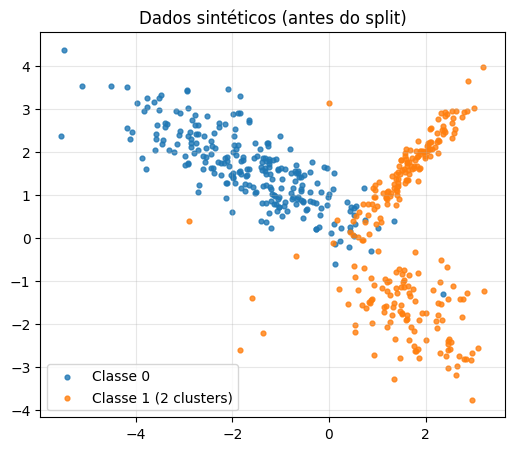

In [29]:
# Parâmetros gerais
N_total = 1000
class_sep = 1.6      # pode ajustar p/ ficar mais ou menos desafiador
flip_y = 0.02        # fração de ruído (rótulos trocados)
random_state = 42

# 1) Classe 0 com 1 cluster
X0, y0 = make_classification(
    n_samples=N_total//2, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1, n_classes=2,
    class_sep=class_sep, flip_y=flip_y,
    random_state=random_state
)
# Filtra apenas a classe 0
X0 = X0[y0 == 0]
y0 = np.zeros((X0.shape[0],), dtype=int)

# 2) Classe 1 com 2 clusters: gera um conjunto com n_clusters_per_class=2 e pega só a classe 1
X1_full, y1_full = make_classification(
    n_samples=N_total, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=2, n_classes=2,
    class_sep=class_sep, flip_y=flip_y,
    random_state=random_state + 1
)
X1 = X1_full[y1_full == 1]
y1 = np.ones((X1.shape[0],), dtype=int)

# Balanceia o tamanho: escolhe min entre os dois lados
n = min(len(X0), len(X1))
X0 = X0[:n]
y0 = y0[:n]
X1 = X1[:n]
y1 = y1[:n]

# Combina
X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

# Embaralha
perm = np.random.permutation(len(X))
X = X[perm]
y = y[perm]

print(f"X shape: {X.shape}, y shape: {y.shape}, classe 0: {np.sum(y==0)}, classe 1: {np.sum(y==1)}")

# Visualização bruta (sem padronização)
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], s=12, label="Classe 0", alpha=0.8)
plt.scatter(X[y==1,0], X[y==1,1], s=12, label="Classe 1 (2 clusters)", alpha=0.8)
plt.title("Dados sintéticos (antes do split)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajustar shapes de y p/ coluna
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(398, 2) (398, 1) (100, 2) (100, 1)


In [31]:
# Arquitetura
n_in = 2
n_hidden = 16
n_out = 1

# Inicialização Xavier/Glorot p/ tanh
limit1 = np.sqrt(6.0 / (n_in + n_hidden))
W1 = np.random.uniform(-limit1, limit1, size=(n_in, n_hidden))
b1 = np.zeros((1, n_hidden))

limit2 = np.sqrt(6.0 / (n_hidden + n_out))
W2 = np.random.uniform(-limit2, limit2, size=(n_hidden, n_out))
b2 = np.zeros((1, n_out))

def forward(Xb):
    # Xb: (m, 2)
    z1 = Xb @ W1 + b1          # (m, hidden)
    a1 = tanh(z1)              # (m, hidden)
    z2 = a1 @ W2 + b2          # (m, 1)
    a2 = sigmoid(z2)           # (m, 1)
    cache = (Xb, z1, a1, z2, a2)
    return a2, cache

def backward(cache, yb):
    # yb: (m,1)
    Xb, z1, a1, z2, a2 = cache
    m = Xb.shape[0]

    # BCE + sigmoid -> dL/dz2 = (a2 - y) / m
    dz2 = (a2 - yb) / m                     # (m,1)
    dW2 = a1.T @ dz2                        # (hidden,1)
    db2 = np.sum(dz2, axis=0, keepdims=True)# (1,1)

    da1 = dz2 @ W2.T                        # (m,hidden)
    dz1 = da1 * dtanh(a1)                   # (m,hidden)
    dW1 = Xb.T @ dz1                        # (2,hidden)
    db1 = np.sum(dz1, axis=0, keepdims=True)# (1,hidden)

    return dW1, db1, dW2, db2

def update_params(dW1, db1_, dW2, db2_, lr):
    global W1, b1, W2, b2
    W1 -= lr * dW1
    b1 -= lr * db1_
    W2 -= lr * dW2
    b2 -= lr * db2_


Epoch    1 | loss=0.5989 | acc_train=0.9271
Epoch   25 | loss=0.1912 | acc_train=0.9372
Epoch   50 | loss=0.1536 | acc_train=0.9422
Epoch   75 | loss=0.1555 | acc_train=0.9372
Epoch  100 | loss=0.1495 | acc_train=0.9397
Epoch  125 | loss=0.1472 | acc_train=0.9397
Epoch  150 | loss=0.1438 | acc_train=0.9422
Epoch  175 | loss=0.1459 | acc_train=0.9422
Epoch  200 | loss=0.1496 | acc_train=0.9397
Epoch  225 | loss=0.1481 | acc_train=0.9422
Epoch  250 | loss=0.1531 | acc_train=0.9422
Epoch  275 | loss=0.1605 | acc_train=0.9422
Epoch  300 | loss=0.1393 | acc_train=0.9397


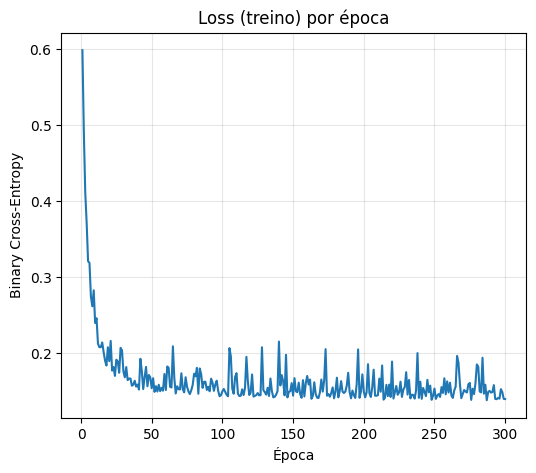

In [32]:
# Hiperparâmetros de treino
epochs = 300
batch_size = 64
lr = 0.05
loss_hist = []

m = X_train.shape[0]
indices = np.arange(m)

for ep in range(1, epochs+1):
    np.random.shuffle(indices)
    X_train_shuf = X_train[indices]
    y_train_shuf = y_train[indices]

    # mini-batches
    ep_loss = 0.0
    n_batches = 0

    for start in range(0, m, batch_size):
        end = start + batch_size
        Xb = X_train_shuf[start:end]
        yb = y_train_shuf[start:end]

        yhat, cache = forward(Xb)
        loss = bce_loss(yb, yhat)
        ep_loss += loss
        n_batches += 1

        dW1, db1_, dW2, db2_ = backward(cache, yb)
        update_params(dW1, db1_, dW2, db2_, lr)

    loss_hist.append(ep_loss / n_batches)

    if ep % 25 == 0 or ep == 1:
        # Acurácia de treino rápida
        yhat_full, _ = forward(X_train)
        acc_tr = accuracy(y_train, yhat_full)
        print(f"Epoch {ep:4d} | loss={loss_hist[-1]:.4f} | acc_train={acc_tr:.4f}")

# Curva de loss
plt.figure()
plt.plot(range(1, epochs+1), loss_hist, marker=None)
plt.title("Loss (treino) por época")
plt.xlabel("Época")
plt.ylabel("Binary Cross-Entropy")
plt.grid(True, alpha=0.3)
plt.show()


In [33]:
# Predições no teste
yprob_test, _ = forward(X_test)
acc_te = accuracy(y_test, yprob_test)
cm = confusion_matrix_manual(y_test, yprob_test)

print(f"Acurácia (teste): {acc_te:.4f}")
print("Matriz de confusão [ [TN, FP], [FN, TP] ]:")
print(cm)

Acurácia (teste): 0.9600
Matriz de confusão [ [TN, FP], [FN, TP] ]:
[[47  3]
 [ 1 49]]


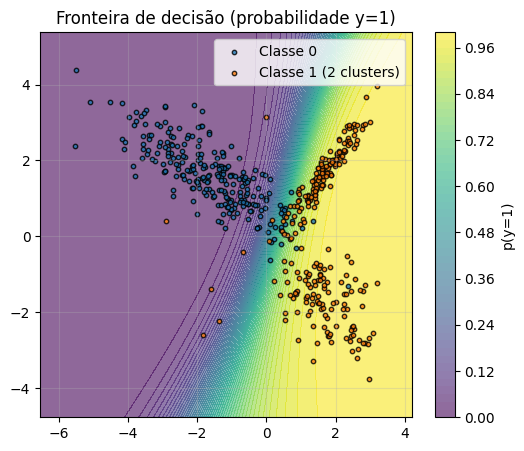

In [34]:
# Grade para visualizar a fronteira
x_min, x_max = X[:,0].min()-1.0, X[:,0].max()+1.0
y_min, y_max = X[:,1].min()-1.0, X[:,1].max()+1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Lembre: padronizamos com 'scaler'
grid_std = scaler.transform(grid)
probs, _ = forward(grid_std)
ZZ = probs.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, ZZ, levels=50, alpha=0.6)
plt.colorbar(label="p(y=1)")
plt.scatter(X[y==0,0], X[y==0,1], s=10, label="Classe 0", edgecolor="k", alpha=0.8)
plt.scatter(X[y==1,0], X[y==1,1], s=10, label="Classe 1 (2 clusters)", edgecolor="k", alpha=0.8)
plt.title("Fronteira de decisão (probabilidade y=1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Exercise 3

**Multi-Class Classification with Synthetic Data and Reusable MLP**

Similar to Exercise 2, but with increased complexity.

Use `make_classification` to generate a synthetic dataset with:

* Number of samples: 1500
* Number of classes: 3
* Number of features: 4
* Number of clusters per class: Achieve 2 clusters for one class, 3 for another, and 4 for the last (again, you may need to generate subsets separately and combine them, as the function doesn't directly support varying clusters per class).
* Other parameters: `n_features=4`, `n_informative=4`, `n_redundant=0`, `random_state=42`.

Implement an MLP from scratch to classify this data. You may choose the architecture freely, but for an extra point (bringing this exercise to 4 points), reuse the exact same MLP implementation code from Exercise 2, modifying only hyperparameters (e.g., output layer size for 3 classes, loss function to categorical cross-entropy if needed) without changing the core structure.

Steps:

1. Generate and split the data (80/20 train/test).
2. Train the model, tracking loss.
3. Evaluate on test set: Report accuracy, and optionally visualize (e.g., scatter plot of data with predicted labels).
4. Submit code and results.

In [35]:
from sklearn.decomposition import PCA

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6, 5)
# --- Ativações ---
def softmax(z):
    # z: (m, K)
    z_shift = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z_shift)
    return e / np.sum(e, axis=1, keepdims=True)

# --- Loss e métricas (multi-classe) ---
def cross_entropy_onehot(y_true_onehot, y_prob, eps=1e-12):
    # y_true_onehot, y_prob: (m, K)
    y_prob = np.clip(y_prob, eps, 1.0 - eps)
    return -np.mean(np.sum(y_true_onehot * np.log(y_prob), axis=1))

def accuracy_multiclass(y_true, y_prob):
    # y_true: (m,1) ou (m,), rótulos {0..K-1}
    y_pred = np.argmax(y_prob, axis=1)
    return (y_pred.reshape(-1) == y_true.reshape(-1)).mean()

def confusion_matrix_k(y_true, y_prob, K):
    y_pred = np.argmax(y_prob, axis=1)
    cm = np.zeros((K, K), dtype=int)
    for t, p in zip(y_true.reshape(-1), y_pred.reshape(-1)):
        cm[t, p] += 1
    return cm

Shapes: (1500, 4) (1500,) | classes: [np.int64(500), np.int64(500), np.int64(500)]


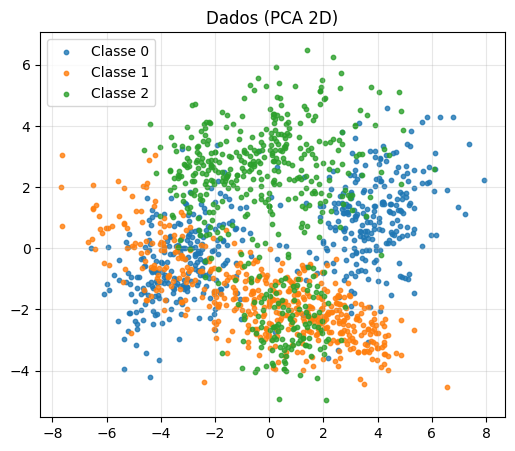

In [36]:
N_total = 1500
K = 3
n_features = 4
class_sep = 1.8
flip_y = 0.00

# Queremos tamanhos semelhantes por classe
target_per_class = N_total // K  # 500

def gen_class_subset(target, n_clusters, rs):
    # como vamos filtrar apenas a classe positiva, geramos o dobro
    n_samples_tmp = target * 2
    X_tmp, y_tmp = make_classification(
        n_samples=n_samples_tmp,
        n_features=n_features,
        n_informative=n_features,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=n_clusters,
        class_sep=class_sep,
        flip_y=flip_y,
        random_state=rs
    )
    X_pos = X_tmp[y_tmp == 1]
    if len(X_pos) < target:
        # se por algum motivo veio menos, reamostrar com rs+1
        X_more, y_more = make_classification(
            n_samples=n_samples_tmp,
            n_features=n_features,
            n_informative=n_features,
            n_redundant=0,
            n_classes=2,
            n_clusters_per_class=n_clusters,
            class_sep=class_sep,
            flip_y=flip_y,
            random_state=rs+101
        )
        X_pos = np.vstack([X_pos, X_more[y_more == 1]])
    return X_pos[:target]

# Classe 0 -> 2 clusters
X0 = gen_class_subset(target_per_class, n_clusters=2, rs=42)
y0 = np.zeros((X0.shape[0],), dtype=int)

# Classe 1 -> 3 clusters
X1 = gen_class_subset(target_per_class, n_clusters=3, rs=43)
y1 = np.ones((X1.shape[0],), dtype=int)

# Classe 2 -> 4 clusters
X2 = gen_class_subset(target_per_class, n_clusters=4, rs=44)
y2 = np.full((X2.shape[0],), 2, dtype=int)

# Combine e embaralhe
X = np.vstack([X0, X1, X2])
y = np.concatenate([y0, y1, y2])

perm = np.random.permutation(len(X))
X = X[perm]
y = y[perm]

print("Shapes:", X.shape, y.shape, "| classes:", [np.sum(y==i) for i in range(K)])

# Visualização rápida em 2D via PCA só para inspecionar
pca = PCA(n_components=2, random_state=0)
X_2d = pca.fit_transform(X)
plt.figure()
for c, lbl in zip(["tab:blue","tab:orange","tab:green"], [0,1,2]):
    plt.scatter(X_2d[y==lbl,0], X_2d[y==lbl,1], s=10, alpha=0.8, label=f"Classe {lbl}", c=c)
plt.title("Dados (PCA 2D)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1200, 4) (1200, 1) (300, 4) (300, 1)


In [38]:
# Arquitetura
n_in = n_features
n_hidden = 32
n_out = K

# Inicialização Xavier/Glorot p/ tanh/softmax
limit1 = np.sqrt(6.0 / (n_in + n_hidden))
W1 = np.random.uniform(-limit1, limit1, size=(n_in, n_hidden))
b1 = np.zeros((1, n_hidden))

limit2 = np.sqrt(6.0 / (n_hidden + n_out))
W2 = np.random.uniform(-limit2, limit2, size=(n_hidden, n_out))
b2 = np.zeros((1, n_out))

def onehot(y, K):
    # y: (m,1)  -> (m,K)
    m = y.shape[0]
    out = np.zeros((m, K), dtype=float)
    out[np.arange(m), y.reshape(-1)] = 1.0
    return out

def forward(Xb):
    z1 = Xb @ W1 + b1         # (m, hidden)
    a1 = tanh(z1)             # (m, hidden)
    z2 = a1 @ W2 + b2         # (m, K)
    a2 = softmax(z2)          # (m, K)
    cache = (Xb, z1, a1, z2, a2)
    return a2, cache

def backward(cache, yb_onehot):
    Xb, z1, a1, z2, a2 = cache
    m = Xb.shape[0]

    # Softmax + CE: grad da saída é (a2 - y) / m
    dz2 = (a2 - yb_onehot) / m          # (m,K)
    dW2 = a1.T @ dz2                    # (hidden,K)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T                    # (m,hidden)
    dz1 = da1 * dtanh(a1)               # (m,hidden)
    dW1 = Xb.T @ dz1                    # (n_in,hidden)
    db1_ = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1_, dW2, db2

def update_params(dW1, db1_, dW2, db2_, lr):
    global W1, b1, W2, b2
    W1 -= lr * dW1
    b1 -= lr * db1_
    W2 -= lr * dW2
    b2 -= lr * db2_


Epoch    1 | loss=0.9847 | acc_train=0.5717
Epoch   25 | loss=0.7307 | acc_train=0.6967
Epoch   50 | loss=0.5286 | acc_train=0.8008
Epoch   75 | loss=0.4153 | acc_train=0.8483
Epoch  100 | loss=0.3526 | acc_train=0.8850
Epoch  125 | loss=0.3169 | acc_train=0.8983
Epoch  150 | loss=0.2904 | acc_train=0.9025
Epoch  175 | loss=0.2701 | acc_train=0.9025
Epoch  200 | loss=0.2559 | acc_train=0.9117
Epoch  225 | loss=0.2439 | acc_train=0.9167
Epoch  250 | loss=0.2333 | acc_train=0.9150
Epoch  275 | loss=0.2225 | acc_train=0.9192
Epoch  300 | loss=0.2137 | acc_train=0.9208
Epoch  325 | loss=0.2055 | acc_train=0.9283
Epoch  350 | loss=0.1999 | acc_train=0.9267


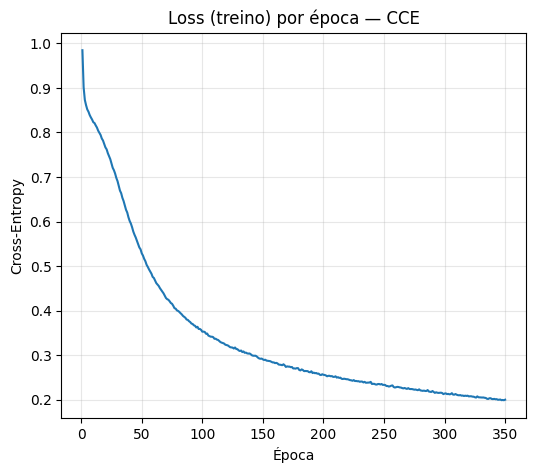

In [39]:
epochs = 350
batch_size = 64
lr = 0.05
loss_hist = []

m = X_train.shape[0]
idxs = np.arange(m)

Ytr_1h = onehot(y_train, K)

for ep in range(1, epochs+1):
    np.random.shuffle(idxs)
    Xtr = X_train[idxs]
    Ytr = Ytr_1h[idxs]

    ep_loss = 0.0
    n_batches = 0

    for start in range(0, m, batch_size):
        end = start + batch_size
        Xb = Xtr[start:end]
        Yb = Ytr[start:end]

        yhat, cache = forward(Xb)
        loss = cross_entropy_onehot(Yb, yhat)
        ep_loss += loss
        n_batches += 1

        dW1, db1_, dW2, db2_ = backward(cache, Yb)
        update_params(dW1, db1_, dW2, db2_, lr)

    loss_hist.append(ep_loss / n_batches)

    if ep % 25 == 0 or ep == 1:
        yhat_tr, _ = forward(X_train)
        acc_tr = accuracy_multiclass(y_train, yhat_tr)
        print(f"Epoch {ep:4d} | loss={loss_hist[-1]:.4f} | acc_train={acc_tr:.4f}")

plt.figure()
plt.plot(range(1, epochs+1), loss_hist)
plt.title("Loss (treino) por época — CCE")
plt.xlabel("Época")
plt.ylabel("Cross-Entropy")
plt.grid(True, alpha=0.3)
plt.show()


In [40]:
yprob_te, _ = forward(X_test)
acc_te = accuracy_multiclass(y_test, yprob_te)
cm = confusion_matrix_k(y_test, yprob_te, K)

print(f"Acurácia (teste): {acc_te:.4f}")
print("Matriz de confusão (linhas = verdade, colunas = predito):")
print(cm)


Acurácia (teste): 0.9200
Matriz de confusão (linhas = verdade, colunas = predito):
[[93  7  0]
 [ 6 90  4]
 [ 6  1 93]]


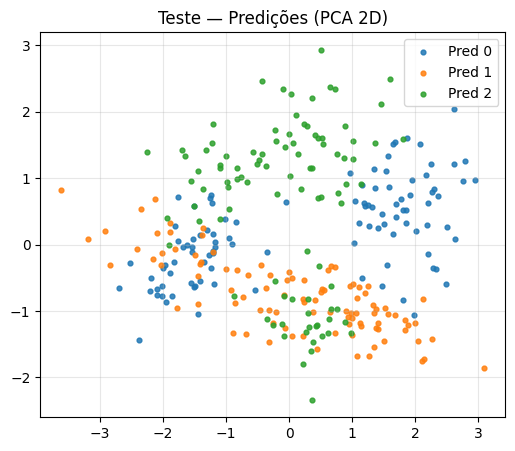

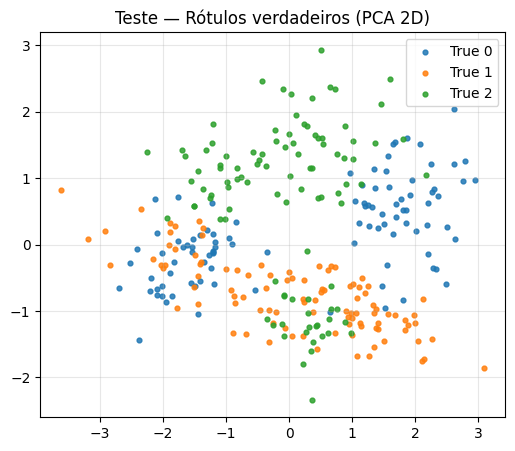

In [41]:
# Projeta teste em 2D para visualizar predições
pca_viz = PCA(n_components=2, random_state=0)
X_all_std = np.vstack([X_train, X_test])
pca_viz.fit(X_all_std)

Xte_2d = pca_viz.transform(X_test)
y_pred = np.argmax(yprob_te, axis=1)

plt.figure()
for c, lbl in zip(["tab:blue","tab:orange","tab:green"], [0,1,2]):
    plt.scatter(Xte_2d[y_pred==lbl,0], Xte_2d[y_pred==lbl,1], s=12, alpha=0.85, label=f"Pred {lbl}", c=c)
plt.title("Teste — Predições (PCA 2D)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure()
for c, lbl in zip(["tab:blue","tab:orange","tab:green"], [0,1,2]):
    plt.scatter(Xte_2d[y_test.reshape(-1)==lbl,0], Xte_2d[y_test.reshape(-1)==lbl,1], s=12, alpha=0.85, label=f"True {lbl}", c=c)
plt.title("Teste — Rótulos verdadeiros (PCA 2D)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Exercise 4

**Multi-Class Classification with Deeper MLP**
Repeat Exercise 3 exactly, but now ensure your MLP has at least 2 hidden layers. You may adjust the number of neurons per layer as needed for better performance. Reuse code from Exercise 3 where possible, but the focus is on demonstrating the deeper architecture. Submit updated code, training results, and test evaluation.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1200, 4) (1200, 1) (300, 4) (300, 1)


In [44]:
# Arquitetura (duas ocultas)
K = 3                 # número de classes
n_in = X_train.shape[1]
n_hidden1 = 64
n_hidden2 = 32
n_out = K

# Xavier/Glorot p/ tanh/softmax
limit1 = np.sqrt(6.0 / (n_in + n_hidden1))
W1 = np.random.uniform(-limit1, limit1, size=(n_in, n_hidden1))
b1 = np.zeros((1, n_hidden1))

limit2 = np.sqrt(6.0 / (n_hidden1 + n_hidden2))
W2 = np.random.uniform(-limit2, limit2, size=(n_hidden1, n_hidden2))
b2 = np.zeros((1, n_hidden2))

limit3 = np.sqrt(6.0 / (n_hidden2 + n_out))
W3 = np.random.uniform(-limit3, limit3, size=(n_hidden2, n_out))
b3 = np.zeros((1, n_out))

def onehot(y, K):
    m = y.shape[0]
    out = np.zeros((m, K), dtype=float)
    out[np.arange(m), y.reshape(-1)] = 1.0
    return out

def forward(Xb):
    # camada 1
    z1 = Xb @ W1 + b1         # (m, h1)
    a1 = tanh(z1)             # (m, h1)
    # camada 2
    z2 = a1 @ W2 + b2         # (m, h2)
    a2 = tanh(z2)             # (m, h2)
    # saída
    z3 = a2 @ W3 + b3         # (m, K)
    a3 = softmax(z3)          # (m, K)
    cache = (Xb, z1, a1, z2, a2, z3, a3)
    return a3, cache

def backward(cache, yb_onehot):
    Xb, z1, a1, z2, a2, z3, a3 = cache
    m = Xb.shape[0]

    # Softmax + CE
    dz3 = (a3 - yb_onehot) / m               # (m,K)
    dW3 = a2.T @ dz3                         # (h2,K)
    db3 = np.sum(dz3, axis=0, keepdims=True) # (1,K)

    da2 = dz3 @ W3.T                         # (m,h2)
    dz2 = da2 * dtanh(a2)                    # (m,h2)
    dW2 = a1.T @ dz2                         # (h1,h2)
    db2_ = np.sum(dz2, axis=0, keepdims=True)# (1,h2)

    da1 = dz2 @ W2.T                         # (m,h1)
    dz1 = da1 * dtanh(a1)                    # (m,h1)
    dW1 = Xb.T @ dz1                         # (n_in,h1)
    db1_ = np.sum(dz1, axis=0, keepdims=True)# (1,h1)

    return dW1, db1_, dW2, db2_, dW3, db3

def update_params(dW1, db1_, dW2, db2_, dW3, db3_, lr):
    global W1, b1, W2, b2, W3, b3
    W1 -= lr * dW1; b1 -= lr * db1_
    W2 -= lr * dW2; b2 -= lr * db2_
    W3 -= lr * dW3; b3 -= lr * db3_


Epoch    1 | loss=0.9843 | acc_train=0.5967
Epoch   25 | loss=0.5223 | acc_train=0.8083
Epoch   50 | loss=0.3642 | acc_train=0.8733
Epoch   75 | loss=0.2886 | acc_train=0.9083
Epoch  100 | loss=0.2422 | acc_train=0.9167
Epoch  125 | loss=0.2163 | acc_train=0.9200
Epoch  150 | loss=0.1987 | acc_train=0.9217
Epoch  175 | loss=0.1820 | acc_train=0.9292
Epoch  200 | loss=0.1738 | acc_train=0.9358
Epoch  225 | loss=0.1579 | acc_train=0.9408
Epoch  250 | loss=0.1528 | acc_train=0.9450
Epoch  275 | loss=0.1401 | acc_train=0.9492
Epoch  300 | loss=0.1403 | acc_train=0.9433
Epoch  325 | loss=0.1281 | acc_train=0.9500
Epoch  350 | loss=0.1219 | acc_train=0.9525
Epoch  375 | loss=0.1154 | acc_train=0.9533
Epoch  400 | loss=0.1118 | acc_train=0.9583


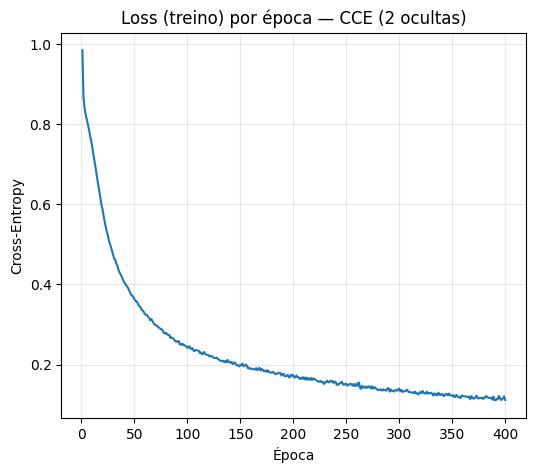

In [45]:
epochs = 400
batch_size = 64
lr = 0.05
loss_hist = []

m = X_train.shape[0]
idxs = np.arange(m)
Ytr_1h = onehot(y_train, K)

for ep in range(1, epochs+1):
    np.random.shuffle(idxs)
    Xtr = X_train[idxs]
    Ytr = Ytr_1h[idxs]

    ep_loss = 0.0
    n_batches = 0

    for start in range(0, m, batch_size):
        end = start + batch_size
        Xb = Xtr[start:end]
        Yb = Ytr[start:end]

        yhat, cache = forward(Xb)
        loss = cross_entropy_onehot(Yb, yhat)
        ep_loss += loss
        n_batches += 1

        dW1, db1_, dW2, db2_, dW3, db3_ = backward(cache, Yb)
        update_params(dW1, db1_, dW2, db2_, dW3, db3_, lr)

    loss_hist.append(ep_loss / n_batches)

    if ep % 25 == 0 or ep == 1:
        yhat_tr, _ = forward(X_train)
        acc_tr = accuracy_multiclass(y_train, yhat_tr)
        print(f"Epoch {ep:4d} | loss={loss_hist[-1]:.4f} | acc_train={acc_tr:.4f}")

plt.figure()
plt.plot(range(1, epochs+1), loss_hist)
plt.title("Loss (treino) por época — CCE (2 ocultas)")
plt.xlabel("Época"); plt.ylabel("Cross-Entropy")
plt.grid(True, alpha=0.3)
plt.show()


In [46]:
yprob_te, _ = forward(X_test)
acc_te = accuracy_multiclass(y_test, yprob_te)
cm = confusion_matrix_k(y_test, yprob_te, K)

print(f"Acurácia (teste): {acc_te:.4f}")
print("Matriz de confusão (linhas = verdade, colunas = predito):")
print(cm)


Acurácia (teste): 0.9533
Matriz de confusão (linhas = verdade, colunas = predito):
[[94  6  0]
 [ 2 96  2]
 [ 4  0 96]]


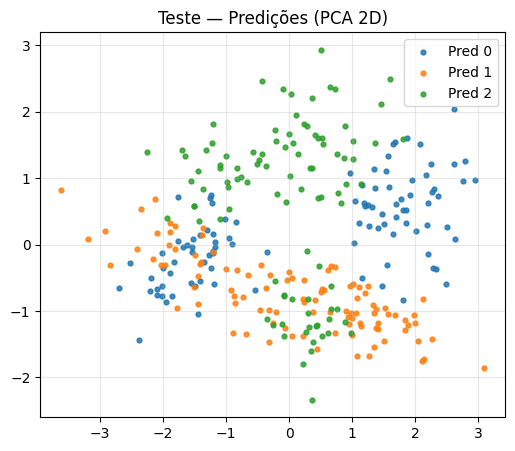

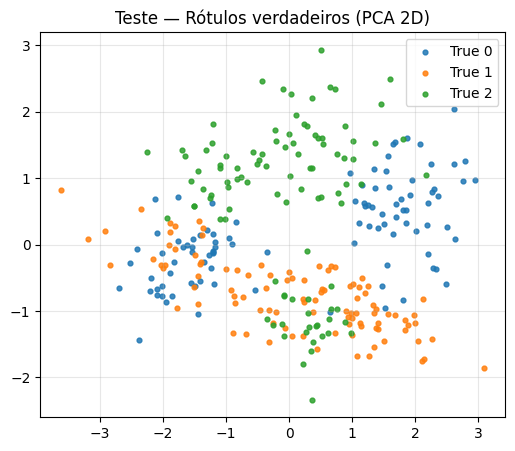

In [47]:
# Projeta treino+teste para PCA consistente e visualiza predições no teste
pca_viz = PCA(n_components=2, random_state=0)
X_all_std = np.vstack([X_train, X_test])
pca_viz.fit(X_all_std)

Xte_2d = pca_viz.transform(X_test)
y_pred = np.argmax(yprob_te, axis=1)

plt.figure()
for c, lbl in zip(["tab:blue","tab:orange","tab:green"], [0,1,2]):
    plt.scatter(Xte_2d[y_pred==lbl,0], Xte_2d[y_pred==lbl,1], s=12, alpha=0.85, label=f"Pred {lbl}", c=c)
plt.title("Teste — Predições (PCA 2D)")
plt.legend(); plt.grid(True, alpha=0.3); plt.show()

plt.figure()
for c, lbl in zip(["tab:blue","tab:orange","tab:green"], [0,1,2]):
    plt.scatter(Xte_2d[y_test.reshape(-1)==lbl,0], Xte_2d[y_test.reshape(-1)==lbl,1], s=12, alpha=0.85, label=f"True {lbl}", c=c)
plt.title("Teste — Rótulos verdadeiros (PCA 2D)")
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


## Verficação de Overfitting do EX4

In [48]:
# === Avaliação treino vs teste ===
yprob_tr, _ = forward(X_train)
yprob_te, _ = forward(X_test)

acc_tr = accuracy_multiclass(y_train, yprob_tr)
acc_te = accuracy_multiclass(y_test, yprob_te)

print(f"Acc TREINO: {acc_tr:.4f}")
print(f"Acc TESTE : {acc_te:.4f}")

loss_tr = cross_entropy_onehot(onehot(y_train, K), yprob_tr)
loss_te = cross_entropy_onehot(onehot(y_test,  K), yprob_te)
print(f"Loss TREINO: {loss_tr:.4f}")
print(f"Loss TESTE : {loss_te:.4f}")

Acc TREINO: 0.9583
Acc TESTE : 0.9533
Loss TREINO: 0.1090
Loss TESTE : 0.1596


`Accuracy Train` foi maior que `Accuracy Test`, indicando que o modelo está sofrendo de overfitting.